### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

### Importing data

In [2]:
data = pd.read_csv('creditcard.csv')

#creating a copy of original data
df = data.copy()

### Exploring the data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

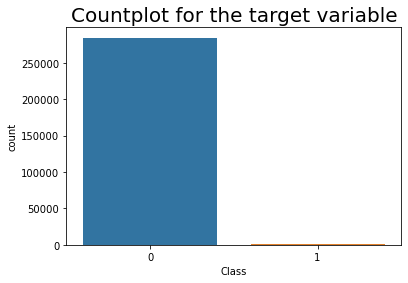

In [5]:
sns.countplot(data = df, x = 'Class')
plt.title('Countplot for the target variable',size = 20)
plt.show()

The count for minority class is hardly recognizable compared to that of majority class

In [6]:
df.Class.value_counts()

#we only have 492 cases of credit card fraud in the entire dataset i.e., our dataset is heavily imbalanced

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


For columns other than the 'Time' column, all seems to be in a similar range of values.

In [8]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values found in any column

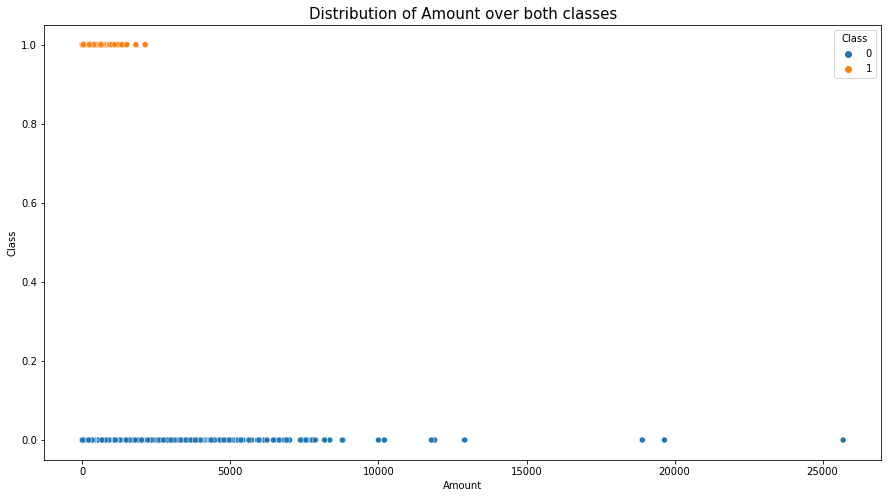

In [9]:
plt.rcParams['figure.figsize'] = (15,8)
sns.scatterplot(data = df, x = 'Amount', y = 'Class',hue = 'Class')
plt.title('Distribution of Amount over both classes',size = 15)
plt.show()

We observe that the frauds have occurred primarily for small amounts

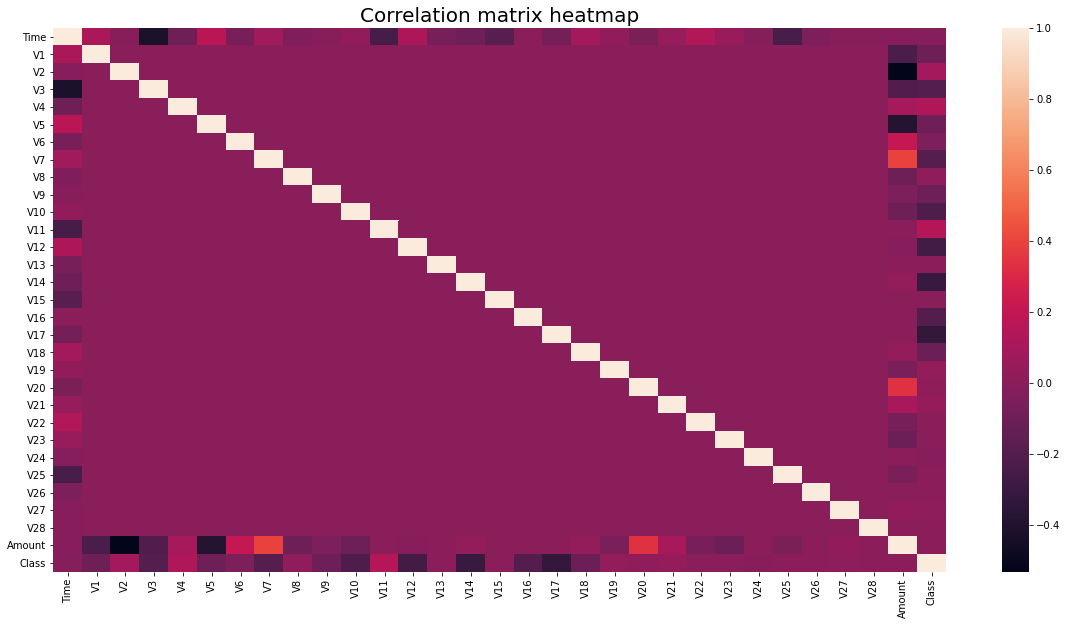

In [10]:
#checking if there is any correlation between columns
plt.rcParams['figure.figsize'] = (20,10)
correlation = df.corr()
sns.heatmap(correlation)
plt.title('Correlation matrix heatmap',size = 20)
plt.show()

There is very little to no correlation amongst columns

### Splitting the data

In [11]:
X = df.drop(['Class','Time'],axis = 1)
Y = df.Class

X_train_1,X_test,Y_train_1,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [12]:
X_train_1.shape

(227845, 29)

In [13]:
Y_train_1.shape

(227845,)

In [14]:
Y_test.shape

(56962,)

In [15]:
targets = pd.DataFrame(Y_test)
targets.shape

(56962, 1)

In [16]:
X_test.shape

(56962, 29)

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#normalising the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in X_train_1:
    scaler = StandardScaler()
    X_train_1[i] = scaler.fit_transform(X_train_1[i].values.reshape(-1,1))
    X_test[i] = scaler.transform(X_test[i].values.reshape(-1,1))

In [19]:
#Balancing with Borderline_SMOTE
borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 0)
X_train, Y_train = borderlineSMOTE.fit_resample(X_train_1,Y_train_1)

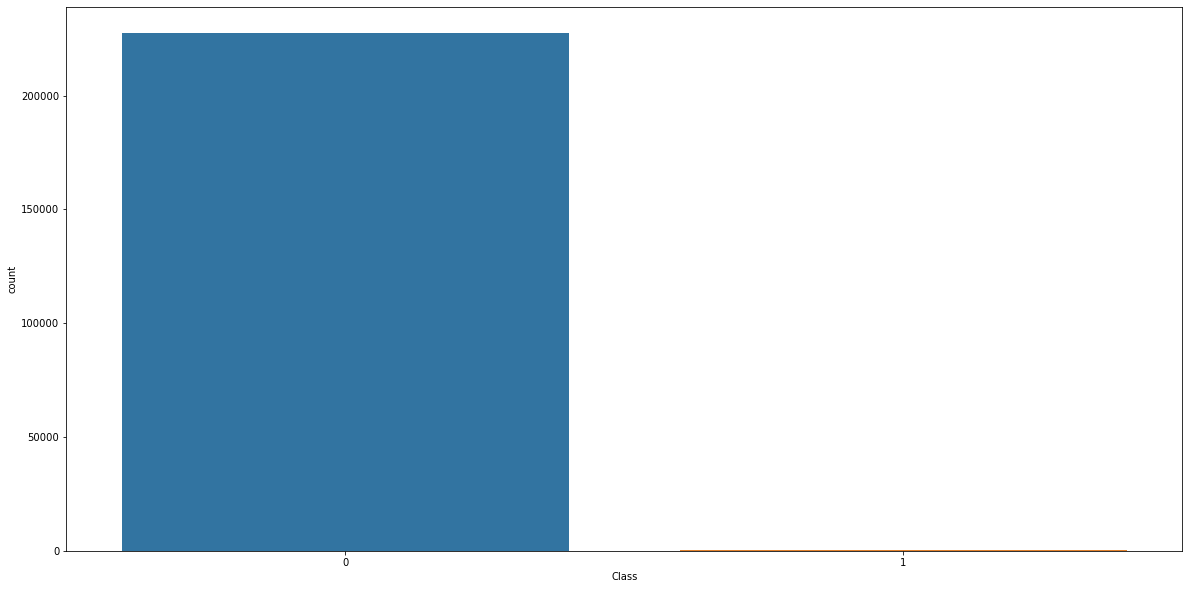

In [20]:
#unbalanced data before oversampling
sns.countplot(x = Y_train_1)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

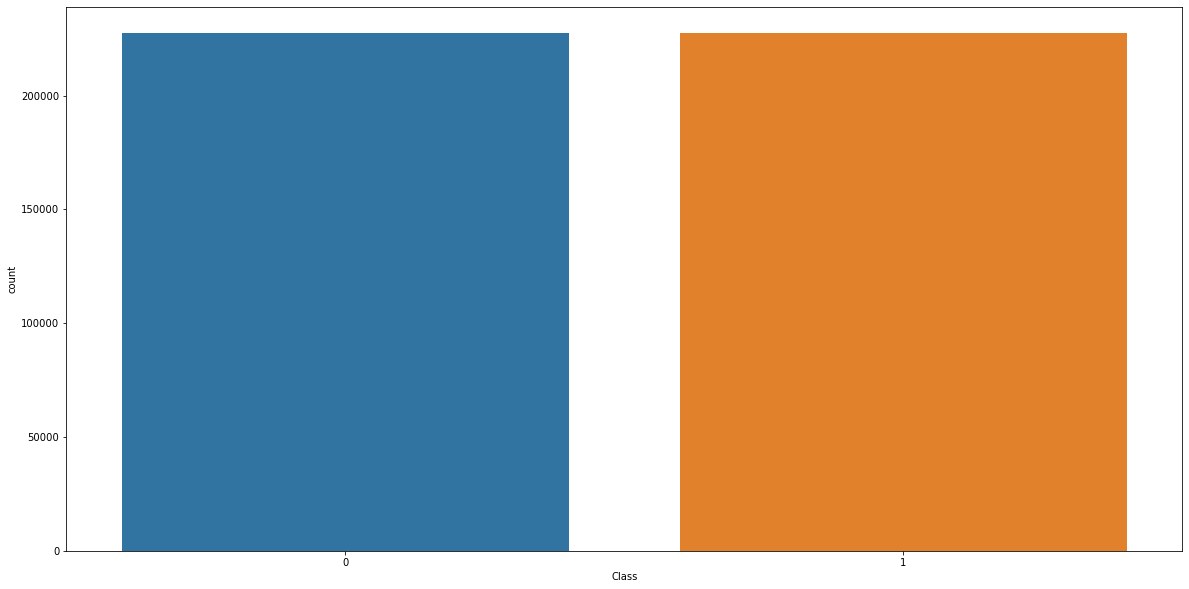

In [21]:
#data after over-sampling
sns.countplot(x = Y_train)

### Random Forest Classifier

In [22]:
rf = RandomForestClassifier(n_estimators = 15,random_state = 0)
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [23]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)

Labeling class 0 as Negative and class 1 as Positive as per convention that minority class is treated as 1

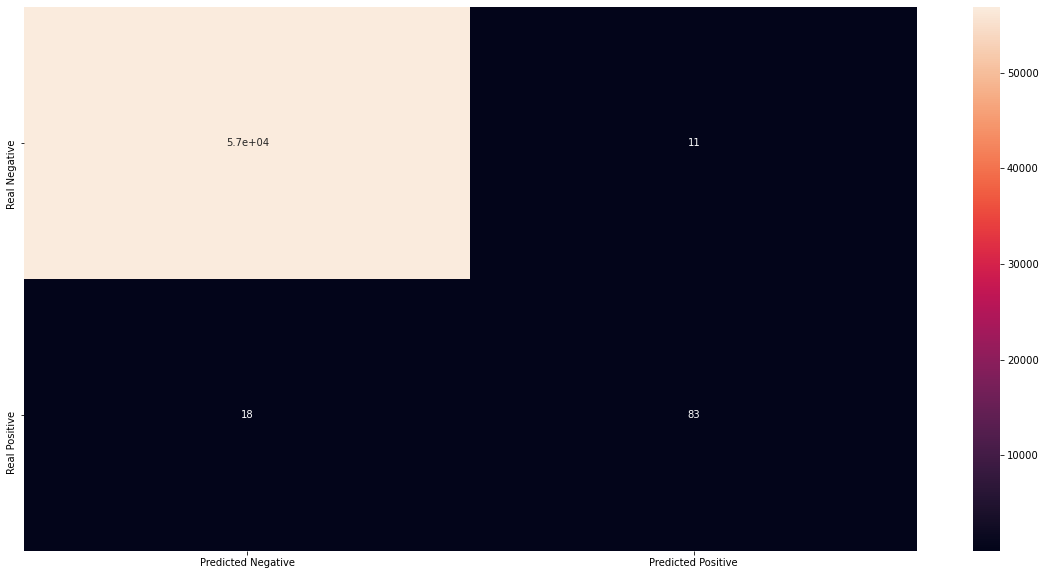

In [24]:
#confusion matrix
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot = True,yticklabels=["Real Negative","Real Positive"],xticklabels=["Predicted Negative", "Predicted Positive"])
plt.show()

In [25]:
print("Precision: ", round(precision*100,2),"%")
print("Recall: ", round(recall*100,2),"%")
print("F1: ", round(f1*100,2),"%")

Precision:  88.3 %
Recall:  82.18 %
F1:  85.13 %


We have obtained good values of precision and recall

### Logistic Regression Model

In [26]:
logReg = LogisticRegression()

logReg.fit(X_train, Y_train)

log_y_pred = logReg.predict(X_test)

log_precision = precision_score(Y_test, log_y_pred)
log_recall = recall_score(Y_test, log_y_pred)
log_f1 = f1_score(Y_test, log_y_pred)

Precision:  11.36 %
Recall:  89.11 %
F1:  20.16 %






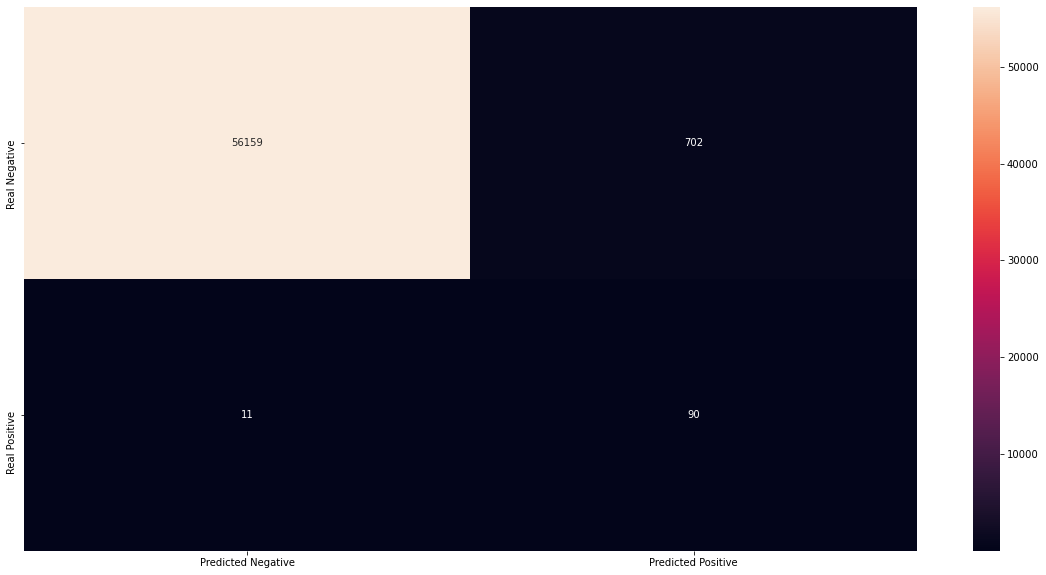

In [27]:
print("Precision: ", round(log_precision*100,2),"%")
print("Recall: ", round(log_recall*100,2),"%")
print("F1: ", round(log_f1*100,2),"%")
print("\n"*3)

cm = confusion_matrix(Y_test,log_y_pred)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=["Real Negative","Real Positive"],xticklabels=["Predicted Negative", "Predicted Positive"])
plt.show()

Logistic Regression has very low F1 score and precision as compared to Random Forest model

Let's try changing the threshold of class separation in logistic regression.

For doing that, we will need the probability values of each observation belonging to either class

In [28]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [29]:
#creating a new model
model2 = LogisticRegression_with_p_values()
model2.fit(X_train,Y_train)

In [30]:
#predicted class
y_pred = model2.model.predict(X_test)

In [31]:
#probabilities of fraud/non-fraud transaction
y_pred_prob = model2.model.predict_proba(X_test)

#keeping only the probabilities of fraud
y_pred_prob = y_pred_prob[:,1]

In [32]:
#creating a df containing actual target class, predicted target class and probability of non-default
targets['predicted_class'] = y_pred
targets['prob_of_fraud'] = y_pred_prob

In [35]:
targets.columns = ['Class','predicted_class','prob_of_fraud']
targets.head()

,Class,predicted_class,prob_of_fraud
183484,0,0,0.011899
255448,0,0,0.010826
244749,0,0,0.001528
63919,0,0,0.000362
11475,0,0,0.014577


In [37]:
#checking roc curves
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(targets.Class, targets.prob_of_fraud)

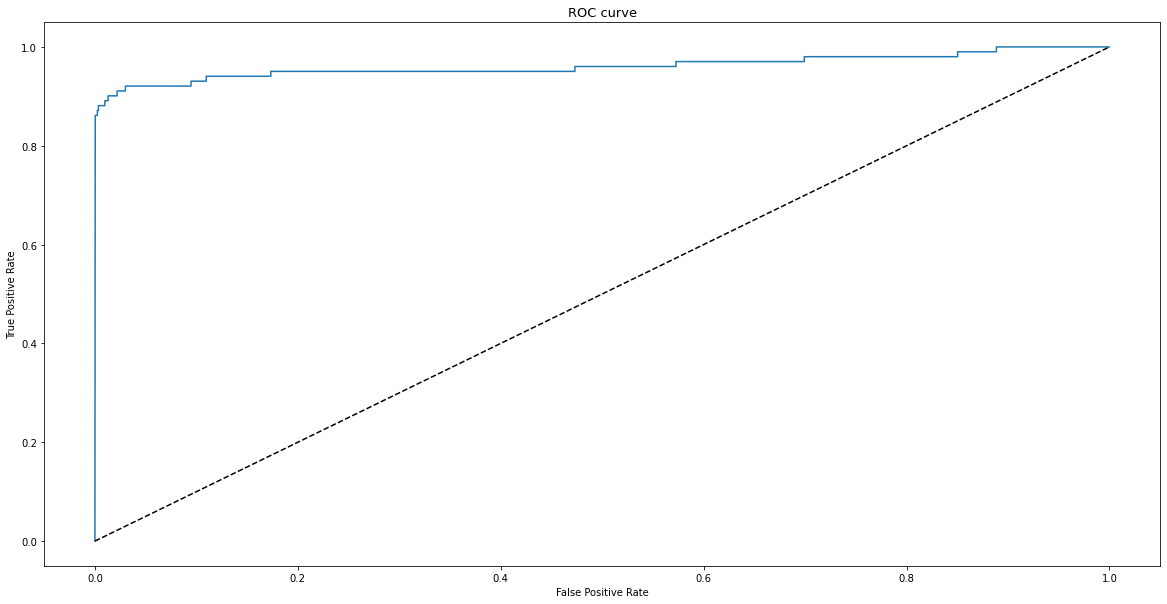

In [38]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, '--k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve',size = 13)
plt.show()

In [39]:
#checking area under the roc curvre
roc_auc = metrics.roc_auc_score(targets.Class, targets.prob_of_fraud)
roc_auc

0.96086844399605

This is a very good score

In [40]:
#concatenate fpr, tpr and thresholds in a single dataframe
df_thresholds = pd.DataFrame(data = thresholds, columns = ['Thresholds'])
df_thresholds.shape

(902, 1)

In [41]:
df_thresholds['FPR'] = fpr
df_thresholds['TPR'] = tpr
df_thresholds.head()

,Thresholds,FPR,TPR
0,2.0,0.000000,0.000000
1,1.0,0.000088,0.316832
2,1.0,0.000088,0.346535
3,1.0,0.000088,0.356436
4,1.0,0.000088,0.376238


In [42]:
df_thresholds['Thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.
df_thresholds.head()

,Thresholds,FPR,TPR
0,1.0,0.000000,0.000000
1,1.0,0.000088,0.316832
2,1.0,0.000088,0.346535
3,1.0,0.000088,0.356436
4,1.0,0.000088,0.376238
